In [4]:
# 1. IMPORT PACKAGES
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

# 2.LOAD DATA

In [5]:
furniture=pd.read_csv('Super Store.csv',encoding='cp1252')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# 3.DATA PREPARATION

# 3.1 dimensions

In [6]:
furniture.shape

(2121, 21)

# 3.2 Statistical summary

In [7]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [8]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

# checking the furniture sales time stamp

In [9]:
furniture['Order Date'].min(),furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [10]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# we remove the columns that we do not need as welll as checking missing values

In [11]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()

# indexing with the Time series Data

In [13]:
furniture['Order Date']=pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date',inplace=True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [14]:
# Resampling the time data
furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [15]:
y=furniture['Sales'].resample('MS').mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412013
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

# Taking look at the furniture sales data for the year 2017

In [ ]:
y['2017':]

In [ ]:
y.plot(figsize=(15,6))
plt.show()

In [ ]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result=adfuller(y)
print('ADF Statistics:%f' %result[0])
print('p-value: %f'%result[1])
print('Critical Values')
for key,value in result[4].items():
    print('\t%s: %.3f' %(key,value))

# MOST IMPORTANT---
# we can see that our statistics value of -5.191070 is less than the value of -3.578 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1%(i.e a low probability that the result is a statistical fluke).Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time dependent structure

# p value 0.00000009<0.05 threhold. hence ho is rejected.time series doesnt have unit root, ie) it is stationary

# DECOMPOSING

# decompose a time series into level,trend and seasonal

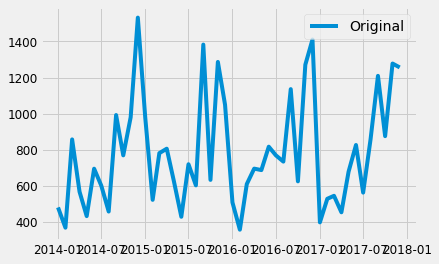

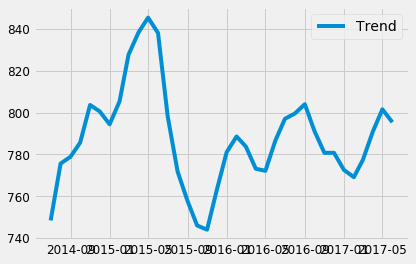

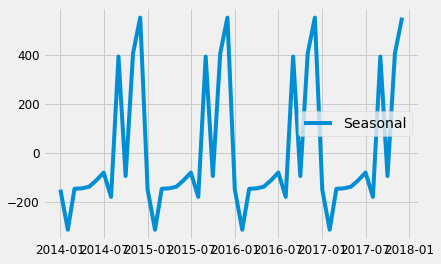

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(y)

plt.plot(y,label='Original')
plt.legend(loc='best')

trend=decomposition.trend
plt.show()
plt.plot(trend,label='Trend')
plt.legend(loc='best')

seasonal=decomposition.seasonal
plt.show()
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

In [ ]:
plt.show()
plt.plot(trend,label='Trend')
plt.legend(loc='best')
# trend is decomposed into seasonal(same is repeated) and residual(trend-seasonal)
seasonal=decomposition.seasonal
plt.show()
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

residual=decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

# TIME SERIES FORECASTING USING ARIMA

In [ ]:
p=d=q=range(0,2)# refer class note for what is p d q --- statistics note
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for seasonal ARIMA....')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

# PARAMETER SELECTION

## WE USE "GRID SEARCH" TO FIND THE OPTIMAL SET OF PARAMETERS THAT YIELDS THE BEST PERFORMANCE FOR OUR MODEL

In [ ]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                          enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12-AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue


# Fitting the ARIMA model

In [ ]:
mod=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,0,12),
                                          enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

# Running model diagnostics

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

# VALIDATING FORECAST
# to understand the accuracy

In [ ]:
# set forecasts to start at 2017-01-01 to the end of the data to forecast
pred=results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# from the above predicted values align with the true values

# Calculating RMSE

In [ ]:
y_forecasted=pred.predicted_mean
y_truth=y['2017-01-01':]
mse=((y_forecasted-y_truth)**2).mean()
print('The root mean squared error of our forecasts is {}'.format(round(np.sqrt(mse),2)))

# RMSE tells that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales

# Visualizing the forecast

In [ ]:
pred_uc=results.get_forecast(steps=13)
pred_ci=pred_uc.conf_int()
ax=y.plot(label='Observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

# CONCLUSION

In [ ]:
# We observe that the sales of furniture produces seasonal pattern.Early of the season is off season.